Ref: https://github.com/FelippeVelosoMarinho/RNA_Praticas_UFMG/blob/main/ASL_Classifier/V_librasTest%20(1).ipynb

https://www.youtube.com/watch?v=0lvHURoyhtc

Dataset teste: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset

### Criando venv no notebook
```
python -m venv tf_env
source tf_env/bin/activate  # No Linux/Mac
tf_env\Scripts\activate   # No Windows (CMD)

pip install -r requirements.txt

pip install ipykernel
python -m ipykernel install --user --name=tf_env --display-name "TensorFlow Clean (venv)"
```

Depois selecione sua versão de kernel

O primeiro passo é realizar o pré-processamento das imagens utilizadas. O tensorflow usa o formato típico 

In [1]:
# Grid de Images
from matplotlib import pyplot as plt

def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 20, 'fontweight': 'medium'})
    plt.show()
    
def showMultipleImages(imgsArray, titlesArray, size, x, y):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, 'gray')
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, 'gray')
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, 'gray')
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

In [2]:
import glob 
import os

current_dir = os.path.abspath(os.getcwd())

print(current_dir)

DIR = r"c:\Users\felip\OneDrive\Documentos\GitHub\ActiveSemisupervisedLearningCNN-s\data\train\PetImages"
DOG_DIR = r"\Dog"
CAT_DIR = r"\Cat"

dog_img_files = glob.glob(DIR + DOG_DIR + '/*') 
cat_img_files = glob.glob(DIR + CAT_DIR + '/*') 
print(f"Arquivos na pasta: {len(dog_img_files)}")
print(dog_img_files[:5])

c:\Users\felip\OneDrive\Documentos\GitHub\ActiveSemisupervisedLearningCNN-s\notebooks
Arquivos na pasta: 12397
['c:\\Users\\felip\\OneDrive\\Documentos\\GitHub\\ActiveSemisupervisedLearningCNN-s\\data\\train\\PetImages\\Dog\\0.jpg', 'c:\\Users\\felip\\OneDrive\\Documentos\\GitHub\\ActiveSemisupervisedLearningCNN-s\\data\\train\\PetImages\\Dog\\1.jpg', 'c:\\Users\\felip\\OneDrive\\Documentos\\GitHub\\ActiveSemisupervisedLearningCNN-s\\data\\train\\PetImages\\Dog\\10.jpg', 'c:\\Users\\felip\\OneDrive\\Documentos\\GitHub\\ActiveSemisupervisedLearningCNN-s\\data\\train\\PetImages\\Dog\\100.jpg', 'c:\\Users\\felip\\OneDrive\\Documentos\\GitHub\\ActiveSemisupervisedLearningCNN-s\\data\\train\\PetImages\\Dog\\1000.jpg']


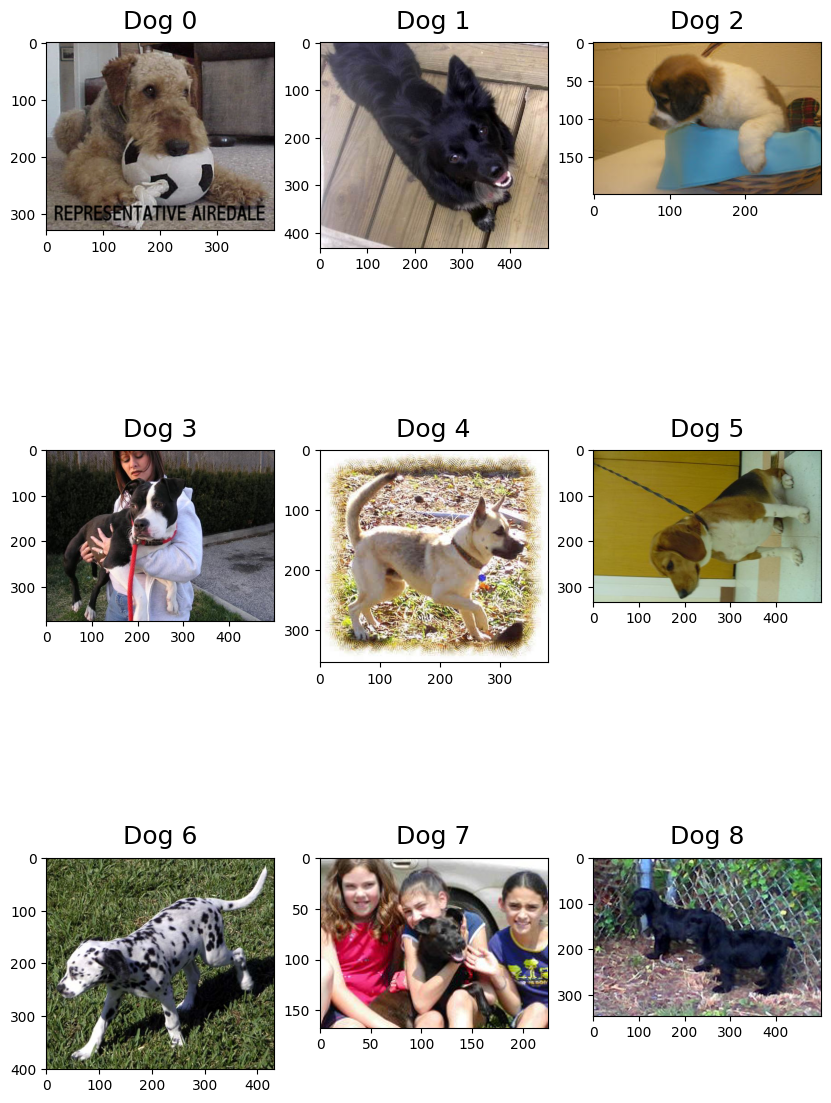

In [3]:
import random 
import cv2

random_dog_imgs = [cv2.imread(img_file) for img_file in random.sample(dog_img_files, 9)] # sorteia 9 imagens aleatórias da lista de cachorros
random_dog_imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in random_dog_imgs]

titles = ['Dog ' + str(i) for i in range(9)]
showMultipleImages(random_dog_imgs, titles, (10, 15), 3, 3)

## Converter base de dados para treino, validação e teste

In [4]:
from PIL import Image

# ⚠️ É crucial garantir que os caminhos sejam definidos corretamente
# Assumindo que DIR é um objeto Pathlib (ex: DIR = Path("c:/caminho/para/data/train/PetImages"))

def filter_valid_images(filepaths: list) -> list:
    """
    Verifica a validade de uma lista de caminhos de arquivos de imagem.
    Adiciona uma verificação inicial de tamanho zero.
    """
    valid_files = []
    corrupted_count = 0
    
    for i, fp in enumerate(filepaths):
        fp_str = str(fp) # Garante que está lidando com string, se 'fp' for um objeto Path
        
        # Otimização 1: Pula arquivos de tamanho zero (frequentemente corrompidos)
        if os.path.getsize(fp_str) == 0:
            corrupted_count += 1
            if i % 500 == 0:
                print(f"❌ Corrompido (tamanho zero): {fp_str}")
            continue
            
        try:
            with Image.open(fp_str) as im:
                im.verify()  # Verifica a integridade do cabeçalho
                # Opcional, mas mais completa: im.transpose(Image.FLIP_LEFT_RIGHT)
                # Tenta carregar os dados se 'im.verify()' não for suficiente.
            valid_files.append(fp)
        except Exception as e:
            # Otimização 2: Log mais claro
            corrupted_count += 1
            if corrupted_count % 500 == 0:
                 # Mostra o erro exato para diagnóstico
                print(f"❌ Corrompido (PIL Error: {e.__class__.__name__}): {fp_str}") 
                
    print(f"\n✅ Concluído. {len(valid_files)} arquivos válidos | {corrupted_count} arquivos corrompidos.")
    return valid_files

In [5]:
from pathlib import Path


DIR = Path(r"c:\Users\felip\OneDrive\Documentos\GitHub\ActiveSemisupervisedLearningCNN-s\data\train\PetImages") 
CAT_DIR = DIR / "Cat"
DOG_DIR = DIR / "Dog"

print("Iniciando a busca de arquivos...")

cat_paths = list(CAT_DIR.rglob("*.jpg")) # rglob faz a busca recursiva
dog_paths = list(DOG_DIR.rglob("*.jpg"))

cat_files = sorted(cat_paths)
dog_files = sorted(dog_paths)

print(f"\nArquivos brutos: Gatos: {len(cat_files):,} | Cachorros: {len(dog_files):,}")
print("--- Iniciando filtragem de imagens corrompidas ---")

# 3. Filtragem
cat_files_valid = filter_valid_images(cat_files)
dog_files_valid = filter_valid_images(dog_files)

# 4. Resultado Final
print("\n" + "="*50)
print(f"Resultado Final: \n")
print(f"✅ Gatos Válidos: {len(cat_files_valid):,} (Pulados: {len(cat_files) - len(cat_files_valid):,})")
print(f"✅ Cachorros Válidos: {len(dog_files_valid):,} (Pulados: {len(dog_files) - len(dog_files_valid):,})")
print(f"✅ TOTAL VÁLIDO: {len(cat_files_valid) + len(dog_files_valid):,}")
print("="*50)

Iniciando a busca de arquivos...

Arquivos brutos: Gatos: 12,427 | Cachorros: 12,397
--- Iniciando filtragem de imagens corrompidas ---

✅ Concluído. 12427 arquivos válidos | 0 arquivos corrompidos.


c:\Users\felip\OneDrive\Documentos\GitHub\ActiveSemisupervisedLearningCNN-s\tf_env\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))



✅ Concluído. 12397 arquivos válidos | 0 arquivos corrompidos.

Resultado Final: 

✅ Gatos Válidos: 12,427 (Pulados: 0)
✅ Cachorros Válidos: 12,397 (Pulados: 0)
✅ TOTAL VÁLIDO: 24,824


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

labels_cat = [0] * len(cat_files) # 0 = Cat
labels_dog = [1] * len(dog_files) # 1 = Dog

y = np.array(labels_cat + labels_dog)

# Suas variáveis X e y
X = np.array(cat_files + dog_files)
y = np.array(labels_cat + labels_dog)

# 1. Separação TESTE (20% do TOTAL)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# X_temp e y_temp agora contêm 80% dos dados (Treino + Validação)

# 2. Separação VALIDAÇÃO (10% do TOTAL, que é 12.5% dos 80% restantes)
# Cálculo: 0.10 (val) / 0.80 (temp) = 0.125
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp
)

print(f"Total de dados: {len(X):,}")
print(f"  - Treino (70%): {len(X_train):,}")
print(f"  - Validação (10%): {len(X_val):,}")
print(f"  - Teste (20%): {len(X_test):,}")
print("-" * 30)
print(f"Distribuição de classes (Teste): {y_test.mean():.4f}")

Total de dados: 24,824
  - Treino (70%): 17,376
  - Validação (10%): 2,483
  - Teste (20%): 4,965
------------------------------
Distribuição de classes (Teste): 0.4993


In [7]:
import tensorflow as tf
import os
from pathlib import Path
import shutil

# MOvendo os arquivos para as pastas corretamente
BASE_SPLIT_DIR = Path("../data")
BASE_SPLIT_DIR.mkdir(exist_ok=True)

DEST_DIRS = {
    'train': BASE_SPLIT_DIR / 'train',
    'validation': BASE_SPLIT_DIR / 'validation',
    'test': BASE_SPLIT_DIR / 'test'
}
# Inicializa e cria as subpastas 'Cat' e 'Dog' em cada destino
for key, dest_dir in DEST_DIRS.items():
    (dest_dir / 'Cat').mkdir(parents=True, exist_ok=True)
    (dest_dir / 'Dog').mkdir(parents=True, exist_ok=True)


def move_files(file_list, dest_key):
    dest_path = DEST_DIRS[dest_key]
    for file_path_str in file_list:
        file_path = Path(file_path_str)
        
        class_name = file_path.parent.name 

        final_dest = dest_path / class_name / file_path.name
        
        shutil.copy(file_path, final_dest)
        
    print(f"✅ Arquivos de {dest_key} movidos: {len(file_list):,}")


move_files(X_train, 'train')
move_files(X_val, 'validation')
move_files(X_test, 'test')

✅ Arquivos de train movidos: 17,376
✅ Arquivos de validation movidos: 2,483
✅ Arquivos de test movidos: 4,965


In [8]:
def identify_corrupted_tf(file_path):
    """Tenta ler e decodificar a imagem usando rotinas do TensorFlow."""
    try:
        img_bytes = tf.io.read_file(str(file_path))
        
        _ = tf.image.decode_jpeg(img_bytes, channels=3)
        return False  # Não corrompido
    except Exception:
        return True   # Corrompido

def safer_purge(base_dir: Path):
    """Percorre o diretório e remove arquivos que o TensorFlow não consegue decodificar."""
    corrupted_files = []
    
    print(f"\n--- Verificando em: {base_dir.name} ---")
    
    for fp in base_dir.rglob("*.jpg"):
        if identify_corrupted_tf(fp):
            corrupted_files.append(fp)

    if corrupted_files:
        print(f"🗑️ Removendo {len(corrupted_files)} arquivos corrompidos...")
        for fp in corrupted_files:
            try:
                os.remove(fp)
                print(f"   Removido: {fp.name}")
            except Exception as e:
                print(f"   Erro ao remover {fp.name}: {e}")
                
    print(f"✅ Limpeza concluída em {base_dir.name}. Total removido: {len(corrupted_files):,}")


# Executa a limpeza segura
for folder_name in ['train', 'validation', 'test']:
    folder_path = BASE_SPLIT_DIR / folder_name
    safer_purge(folder_path)

print("\n--- LIMPEZA FINALIZADA. Os datasets estão prontos para o Keras. ---")


--- Verificando em: train ---
✅ Limpeza concluída em train. Total removido: 0

--- Verificando em: validation ---
✅ Limpeza concluída em validation. Total removido: 0

--- Verificando em: test ---
✅ Limpeza concluída em test. Total removido: 0

--- LIMPEZA FINALIZADA. Os datasets estão prontos para o Keras. ---


## Carregagndo as imagens no TensorFlow

In [9]:
tf.keras.mixed_precision.set_global_policy('float32')

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.20.0
[]


In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

train_folder = BASE_SPLIT_DIR / 'train'
validation_folder = BASE_SPLIT_DIR / 'validation'
test_folder = BASE_SPLIT_DIR / 'test'

CLASS_NAMES = ['Cat', 'Dog']

train_dataset = image_dataset_from_directory(train_folder,
                                             image_size=(180, 180),
                                             batch_size=32,
                                             color_mode='rgb',
                                             class_names=CLASS_NAMES)

validation_dataset = image_dataset_from_directory(validation_folder,
                                                  image_size=(180, 180),
                                                  batch_size=32,
                                                  color_mode='rgb',
                                                  class_names=CLASS_NAMES)

test_dataset = image_dataset_from_directory(test_folder,
                                            image_size=(180, 180),
                                            batch_size=32,color_mode='rgb',
                                            class_names=CLASS_NAMES,
                                            shuffle=False # n embaralha o teste
                                            )
                                            

Found 22502 files belonging to 2 classes.
Found 4710 files belonging to 2 classes.
Found 8878 files belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    print(data_batch[0].shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)
(180, 180, 3)


In [12]:
def normalize_and_cast(image, label):
    """Converte a imagem para float32 e normaliza os valores de pixel."""
    # Garante que os valores de pixel são convertidos para float32 (essencial)
    image = tf.cast(image, tf.float32)
    # Normaliza a escala de 0-255 para 0.0-1.0
    image = image / 255.0
    return image, label

# Aplique a função de normalização a cada dataset
train_dataset = train_dataset.map(normalize_and_cast)
validation_dataset = validation_dataset.map(normalize_and_cast)
test_dataset = test_dataset.map(normalize_and_cast)

print("✅ Datasets recarregados e normalizados para float32. Pronto para treinar!")

✅ Datasets recarregados e normalizados para float32. Pronto para treinar!


## Treinando o modelo

No exemplo abaixo é usado a api sequencial. Seria uma versão mais pra aprendizado do que a funcional (pesquisar depois)



In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#from tensorflow.keras.layers import Rescaling

model = keras.Sequential() # iniciando a api sequencial vazia
#model.add(Rescaling(scale=1.0/255)) # adicionando camada de normalização (representamos cada cor em valores entre 0 e 1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu')) # primeira camada de conv (caminha pela imagem 32 vezes gerando a imagem de borda)
model.add(MaxPooling2D(pool_size=(2, 2))) # operação das imagens de borda que diminui a sobrecarga de info
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(2))
#model.add(Dense(1, activation="sigmoid")) # um neurônio de classificação sigmoid (um perceptron simples)

model.compile(
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [
    ModelCheckpoint(
        filepath="model2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


704/704 ━━━━━━━━━━━━━━━━━━━━ 332s 450ms/step - accuracy: 0.6764 - loss: 0.5962 - val_accuracy: 0.7718 - val_loss: 0.4731
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 324s 460ms/step - accuracy: 0.7734 - loss: 0.4774 - val_accuracy: 0.8140 - val_loss: 0.4146
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 307s 436ms/step - accuracy: 0.8164 - loss: 0.4009 - val_accuracy: 0.8429 - val_loss: 0.3692
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 315s 447ms/step - accuracy: 0.8626 - loss: 0.3142 - val_accuracy: 0.8459 - val_loss: 0.3702
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 378s 536ms/step - accuracy: 0.8990 - loss: 0.2441 - val_accuracy: 0.8510 - val_loss: 0.3865
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 304s 431ms/step - accuracy: 0.9288 - loss: 0.1733 - val_accuracy: 0.8705 - val_loss: 0.3862
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 303s 430ms/step - accuracy: 0.9512 - loss: 0.1239 - val_accuracy: 0.8892 - val_loss: 0.3922
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 322s 447ms/step - accuracy: 0.9651 - loss: 0.09

## Visualização dos resultados

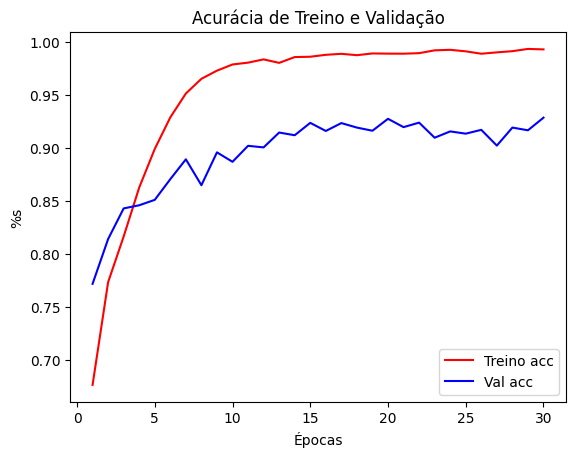

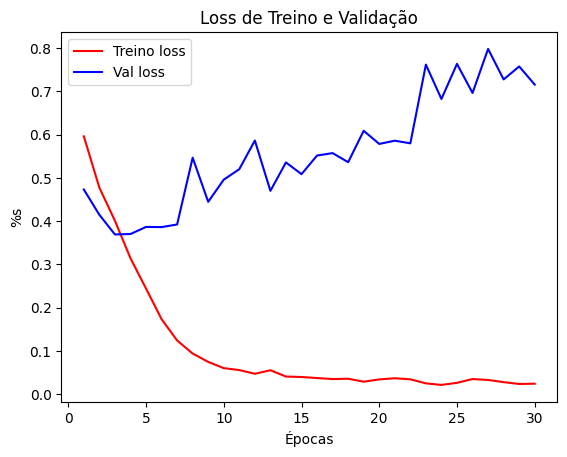

In [22]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Treino acc")
plt.plot(epochs, val_accuracy, "b", label="Val acc")
plt.xlabel("Épocas")
plt.ylabel("%s")
plt.title("Acurácia de Treino e Validação")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Treino loss")
plt.plot(epochs, val_loss, "b", label="Val loss")
plt.xlabel("Épocas")
plt.ylabel("%s")
plt.title("Loss de Treino e Validação")
plt.legend()
plt.show()

## Treinamento ASSL

In [13]:
import sys
from pathlib import Path

# 1. Encontra o caminho da pasta raiz do projeto (onde está o config.py)
# Assumimos que o notebook está em um subdiretório e a pasta raiz é o nível acima.
# Se o notebook estiver na raiz, use '.'
PROJECT_ROOT = Path("..").resolve() # Sobe um nível e resolve o caminho absoluto

# 2. Adiciona o caminho da raiz ao sys.path
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))
    print(f"✅ Adicionado ao PYTHONPATH: {PROJECT_ROOT}")
else:
    print(f"📁 Pasta raiz já está no PYTHONPATH: {PROJECT_ROOT}")

# Agora, você pode importar 'config'
from config import BASE_SPLIT_DIR, CLASS_NAMES

print("-" * 30)
print(f"Importação bem-sucedida! BASE_SPLIT_DIR: {BASE_SPLIT_DIR}")

✅ Adicionado ao PYTHONPATH: C:\Users\felip\OneDrive\Documentos\GitHub\ActiveSemisupervisedLearningCNN-s
------------------------------
Importação bem-sucedida! BASE_SPLIT_DIR: c:\Users\felip\OneDrive\Documentos\GitHub\ActiveSemisupervisedLearningCNN-s\data


In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from config import H, W, NUM_CLASSES

# as imagens são definidas como image_size=(180, 180) na divisão do dataset pro tensorflow

INPUT_SHAPE = (H, W, 3)  # defina H,W conforme seu dataset

def build_model():
    model = keras.Sequential([
        layers.Input(shape=INPUT_SHAPE),
        layers.Rescaling(1./255),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation='relu'),
        layers.Flatten(),
        layers.Dense(NUM_CLASSES)  # logits
    ])
    return model

model = build_model()
optimizer = keras.optimizers.Adam()


#### FixMatch
Método de aprendizado semi-supervisionado que combina consistência e pseudo-rotulagem:

O modelo gera uma predição para a imagem weak.

Se a probabilidade máxima for ≥ τ (ex.: 0.95), essa classe vira o pseudo-rótulo.

A imagem strong é usada para calcular uma perda não supervisionada (cross-entropy entre o pseudo-rótulo e a predição da versão strong).
Isso permite treinar com imagens não rotuladas usando apenas as predições mais confiantes.

Obs: As Random layers* do Keras se aproximam da ideia do FixMatch

In [15]:
weak_aug = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomTranslation(0.05, 0.05),
])

strong_aug = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

In [16]:
PROJECT_ROOT = Path("..").resolve() # Sobe um nível e resolve o caminho absoluto

# 2. Adiciona o caminho da raiz ao sys.path
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))
    print(f"✅ Adicionado ao PYTHONPATH: {PROJECT_ROOT}")
else:
    print(f"📁 Pasta raiz já está no PYTHONPATH: {PROJECT_ROOT}")
    
from config import BASE_SPLIT_DIR, CLASS_NAMES, RANDOM_SEED, H, W

# --- 1. Configuração e Recuperação de Caminhos ---

# O diretório 'train' contém todas as imagens que usaremos para o SSL
BASE_SPLIT_DIR = Path(r"c:\Users\felip\OneDrive\Documentos\GitHub\ActiveSemisupervisedLearningCNN-s\data") 

print(BASE_SPLIT_DIR)
TRAIN_ROOT_DIR = BASE_SPLIT_DIR / 'train'
IMAGE_SIZE = (H, W) # 180x180

if not TRAIN_ROOT_DIR.exists():
    raise FileNotFoundError(f"Diretório de treino não encontrado: {TRAIN_ROOT_DIR}")

# Encontra todos os caminhos dos arquivos e determina seus rótulos
all_paths = []
all_labels = []
label_map = {name: i for i, name in enumerate(CLASS_NAMES)} # {'Cat': 0, 'Dog': 1}

for class_name in CLASS_NAMES:
    class_dir = TRAIN_ROOT_DIR / class_name
    paths = list(class_dir.rglob("*.jpg"))
    all_paths.extend(paths)
    all_labels.extend([label_map[class_name]] * len(paths))

all_paths = np.array([str(p) for p in all_paths])
all_labels = np.array(all_labels)

# Cria IDs a partir do nome do arquivo
all_ids = np.array([Path(p).name for p in all_paths])

print(f"Total de imagens rotuladas no conjunto de treino (X): {len(all_paths):,}")
print(f"Distribuição de classes (antes do split): {np.mean(all_labels):.4f} (Dog)")

# --- 2. Divisão em Conjuntos Rotulado (L) e Não Rotulado (U) ---

# Vamos simular um cenário onde apenas 10% do treino é Rotulado (L) e 90% é Não Rotulado (U)
L_SIZE = 0.1 # 10% para o conjunto rotulado

L_paths, U_paths, L_labels, U_labels = train_test_split(
    all_paths, 
    all_labels, 
    test_size=(1 - L_SIZE), # 90% para o conjunto U
    random_state=RANDOM_SEED, 
    shuffle=True,
    stratify=all_labels
)

# Separa os IDs: L_ids para as rotuladas, U_ids para as não rotuladas
L_ids = np.array([Path(p).name for p in L_paths])
U_ids = np.array([Path(p).name for p in U_paths])

print("-" * 50)
print(f"Simulação SSL concluída:")
print(f"  - Conjunto Rotulado (L): {len(L_paths):,} imagens")
print(f"  - Conjunto Não Rotulado (U): {len(U_paths):,} imagens")
print("-" * 50)


# --- 3. Criação dos Datasets tf.data ---

# O tensor de caminhos será o "X" de cada conjunto.

# Conjunto Rotulado (L) terá (Caminho, Rótulo, ID)
L_ds_raw = tf.data.Dataset.from_tensor_slices((L_paths, L_labels, L_ids))

# Conjunto Não Rotulado (U) terá (Caminho, ID). O rótulo "U_labels" é descartado, 
# mas usamos U_paths para carregar a imagem.
U_ds_raw = tf.data.Dataset.from_tensor_slices((U_paths, U_ids))


# --- 4. Função de Mapeamento para Carregar Imagem ---

def load_image(image_path):
    """Carrega, decodifica, redimensiona e normaliza a imagem."""
    img_bytes = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img_bytes, channels=3)
    img = tf.image.resize(img, IMAGE_SIZE)
    img = img / 255.0  # Normalização
    return img

def map_l_ds(image_path, label, image_id):
    """Mapeia (Caminho, Rótulo, ID) para (Imagem, Rótulo, ID)."""
    image = load_image(image_path)
    # Retorna Imagem, Rótulo (y), ID
    return image, label, image_id

def map_u_ds(image_path, image_id):
    """Mapeia (Caminho, ID) para (Imagem, ID)."""
    image = load_image(image_path)
    # Retorna Imagem (X), ID
    return image, image_id


# --- 5. Aplicação do Mapeamento e Configuração Final dos Datasets ---

# Aplica a função de mapeamento (carregamento real da imagem)
L_ds = L_ds_raw.map(map_l_ds, num_parallel_calls=tf.data.AUTOTUNE)
U_ds = U_ds_raw.map(map_u_ds, num_parallel_calls=tf.data.AUTOTUNE)

# Otimizações (Batches e Prefetch)
BATCH_SIZE = 32
L_ds = L_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
U_ds = U_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


# --- Verificação da Estrutura (Opcional) ---

print("\nVerificação da Estrutura dos Datasets tf.data:")
for element in L_ds.take(1):
    image, label, image_id = element
    print(f"L_ds - Image shape: {image.shape}, Label shape: {label.shape}, ID shape: {image_id.shape}")
    print(f"L_ds - Exemplo de ID: {image_id.numpy()[0]}")

for element in U_ds.take(1):
    image, image_id = element
    print(f"U_ds - Image shape: {image.shape}, ID shape: {image_id.shape}")
    print(f"U_ds - Exemplo de ID: {image_id.numpy()[0]}")


# ----------------------------------------------------------------------
# NOTA: O validation_dataset e test_dataset originais (Cel. 2)
# Podem ser usados normalmente para avaliação, pois não são divididos.
# ----------------------------------------------------------------------

📁 Pasta raiz já está no PYTHONPATH: C:\Users\felip\OneDrive\Documentos\GitHub\ActiveSemisupervisedLearningCNN-s
c:\Users\felip\OneDrive\Documentos\GitHub\ActiveSemisupervisedLearningCNN-s\data
Total de imagens rotuladas no conjunto de treino (X): 22,502
Distribuição de classes (antes do split): 0.5001 (Dog)
--------------------------------------------------
Simulação SSL concluída:
  - Conjunto Rotulado (L): 2,250 imagens
  - Conjunto Não Rotulado (U): 20,252 imagens
--------------------------------------------------

Verificação da Estrutura dos Datasets tf.data:
L_ds - Image shape: (32, 180, 180, 3), Label shape: (32,), ID shape: (32,)
L_ds - Exemplo de ID: b'6460.jpg'
U_ds - Image shape: (32, 180, 180, 3), ID shape: (32,)
U_ds - Exemplo de ID: b'4786.jpg'


In [17]:
BATCH = 64

# L: (img,label,id) -> (img,label,id)
L_ds = L_ds.shuffle(2048).batch(BATCH).prefetch(tf.data.AUTOTUNE)

# U: gere weak/strong já no pipeline
def map_unlabeled(img, sid):
    img_w = weak_aug(img)
    img_s = strong_aug(img)
    return (img_w, img_s, sid)

U_ds = U_ds.shuffle(4096).map(map_unlabeled, num_parallel_calls=tf.data.AUTOTUNE)\
         .batch(BATCH).prefetch(tf.data.AUTOTUNE)


### Métricas por amostra + EMA/UCB

EMA (Exponential Moving Average)

Técnica que mantém uma média suavizada ao longo do tempo.
Serve para reduzir flutuações bruscas na incerteza de uma amostra.
Fórmula:




onde α é a taxa de atualização (geralmente 0.8).

UCB (Upper Confidence Bound)

Usada para ponderar média + variância de uma métrica, originada do reinforcement learning.
Ela favorece amostras com alta incerteza ou alta variação (potencialmente informativas).


	​


onde c controla o grau de exploração (típico: 0.5 para incerteza e 2.0 para inconsistência).

Essas estruturas são aplicadas tanto à incerteza quanto à inconsistência de cada amostra U.
Precisamos de um ID por amostra em U para acumular EMA/UCB corretamente. Se seu train_dataset já é tf.data.Dataset

In [18]:
from collections import defaultdict
import math

alpha = 0.8         # taxa EMA
c_u, c_i = 0.5, 2.0 # UCB (uncertainty, inconsistency)
tau = 0.95          # limiar FixMatch p/ pseudo-rótulo
lambda_u = 1.0      # peso da perda não supervisionada

u_mean = defaultdict(float)
u_var  = defaultdict(float)
i_mean = defaultdict(float)
i_var  = defaultdict(float)

def ema_update(mean_dict, var_dict, key, value, alpha):
    prev_mean = mean_dict[key]
    mean = alpha * value + (1 - alpha) * prev_mean
    var  = alpha * (value - mean)**2 + (1 - alpha) * var_dict[key]
    mean_dict[key] = mean
    var_dict[key]  = var

def ucb(mean, var, c):
    return mean + c * math.sqrt(max(var, 1e-12))


### Aux

In [20]:
import tensorflow.keras.backend as K

def softmax_logits(logits):
    return tf.nn.softmax(logits, axis=-1)

def pseudo_el2n(probs):
    # probs: [B, C]
    yhat = tf.argmax(probs, axis=-1)                    # [B]
    onehot = tf.one_hot(yhat, depth=tf.shape(probs)[-1])
    diff = probs - tf.cast(onehot, probs.dtype)
    return tf.reduce_sum(tf.square(diff), axis=-1)      # [B]

def sym_kl(p, q, eps=1e-8):
    p = tf.clip_by_value(p, eps, 1.0)
    q = tf.clip_by_value(q, eps, 1.0)
    kl_pq = tf.reduce_sum(p * (tf.math.log(p) - tf.math.log(q)), axis=-1)
    kl_qp = tf.reduce_sum(q * (tf.math.log(q) - tf.math.log(p)), axis=-1)
    return 0.5 * (kl_pq + kl_qp)                        # [B]


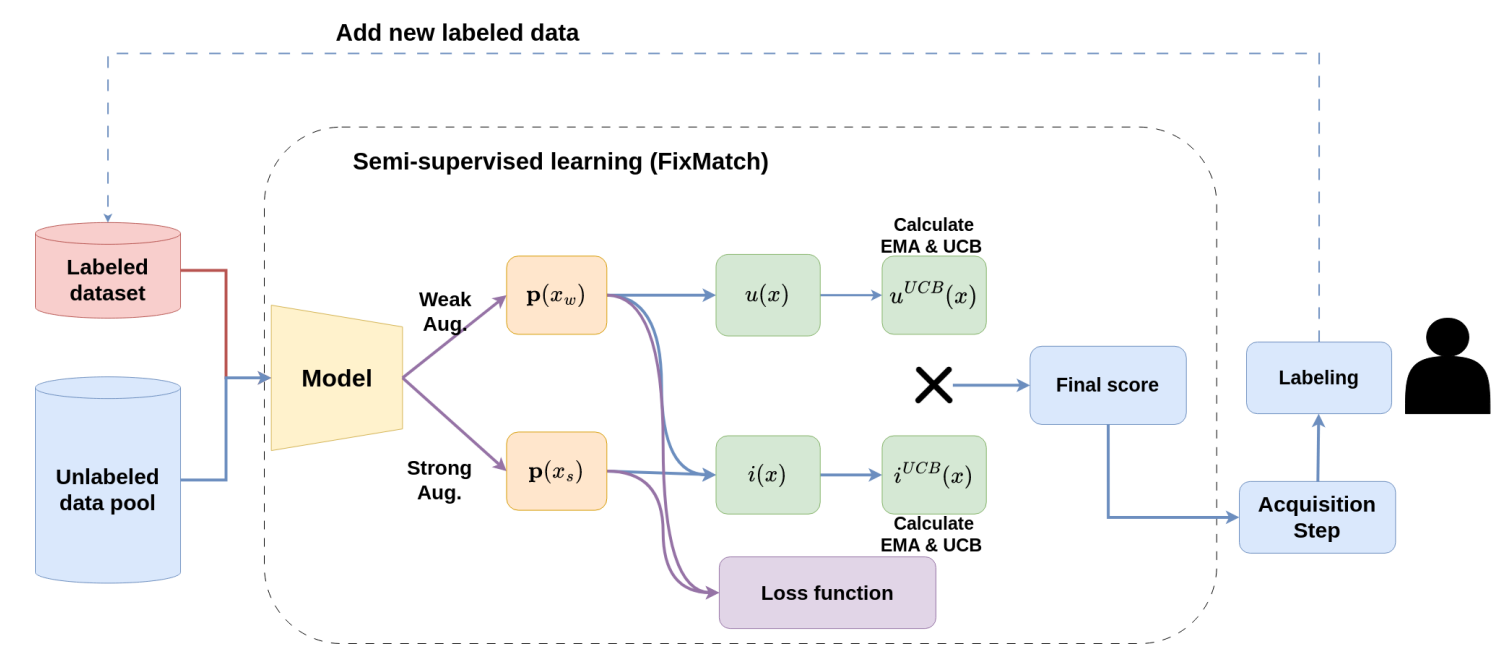

In [22]:
loss_obj = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

@tf.function
def train_step_supervised(batch):
    x_l, y_l, _ = batch
    with tf.GradientTape() as tape:
        logits_l = model(x_l, training=True)
        loss_sup = loss_obj(y_l, logits_l)
    grads = tape.gradient(loss_sup, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(logits_l, -1), tf.cast(y_l, tf.int64)), tf.float32))
    return loss_sup, acc

@tf.function
def train_step_unlabeled(batch):
    x_w, x_s, sids = batch  # weak, strong, ids
    with tf.GradientTape() as tape:
        # forward weak (probs para pseudo-rótulo) e strong (para consistência)
        logits_w = model(x_w, training=True)
        logits_s = model(x_s, training=True)
        probs_w  = softmax_logits(logits_w)
        probs_s  = softmax_logits(logits_s)

        # --- Pseudo-rótulo da weak ---
        conf = tf.reduce_max(probs_w, axis=-1)              # [B]
        yhat = tf.argmax(probs_w, axis=-1)                  # [B]
        mask = conf >= tau
        # perda unsupervisionada apenas onde conf >= tau
        loss_unsup = tf.constant(0., dtype=tf.float32)
        masked = tf.where(mask)
        if tf.shape(masked)[0] > 0:
            logits_s_mask = tf.gather(logits_s, masked[:,0])
            yhat_mask     = tf.gather(yhat, masked[:,0])
            loss_unsup = loss_obj(yhat_mask, logits_s_mask)

        # nenhuma supervisão aqui além da unsup (FixMatch padrão)
        loss = lambda_u * loss_unsup

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # --- Métricas por amostra (fora do gradiente) ---
    u_batch = pseudo_el2n(probs_w)          # [B]
    i_batch = sym_kl(probs_w, probs_s)      # [B]
    return loss, u_batch, i_batch, sids
 

In [23]:
def run_one_round(L_ds, U_ds, epochs=5):
    # métricas simples de monitoramento
    for ep in range(epochs):
        # 1) supervisionado
        for batch in L_ds:
            loss_sup, acc = train_step_supervised(batch)

        # 2) não-rotulado (FixMatch + EMA/UCB updates)
        for batch in U_ds:
            loss_unsup, u_batch, i_batch, sids = train_step_unlabeled(batch)

            # atualiza EMA/var por amostra
            u_vals = u_batch.numpy()
            i_vals = i_batch.numpy()
            sid_vals = sids.numpy()
            for val_u, val_i, sid in zip(u_vals, i_vals, sid_vals):
                ema_update(u_mean, u_var, int(sid), float(val_u), alpha)
                ema_update(i_mean, i_var, int(sid), float(val_i), alpha)


### Final Score

In [24]:
def acquire_topK(U_index_list, K):
    scored = []
    for sid in U_index_list:
        mu_u, vu_u = u_mean[sid], u_var[sid]
        mu_i, vi_i = i_mean[sid], i_var[sid]
        u_ucb = ucb(mu_u, vu_u, c_u)
        i_ucb = ucb(mu_i, vi_i, c_i)
        score = u_ucb * i_ucb
        scored.append((score, sid))
    scored.sort(reverse=True, key=lambda x: x[0])
    return [sid for _, sid in scored[:K]]


In [27]:
import json, os, shutil
from typing import List, Dict

def export_annotation_batch(selected_ids: List[int],
                            U_records: List[Dict],
                            out_dir: str,
                            copy_files: bool = False) -> str:
    """
    Gera um manifest JSONL para anotação humana.
    Campos: {"sid": ..., "path": "...", "hint": "..."}
    Retorna o caminho do manifest.
    """
    os.makedirs(out_dir, exist_ok=True)
    manifest_path = os.path.join(out_dir, "to_annotate.jsonl")

    # indexar U por sid
    by_id = {r["sid"]: r for r in U_records}
    with open(manifest_path, "w", encoding="utf-8") as f:
        for sid in selected_ids:
            rec = by_id[sid]
            item = {"sid": int(sid)}

            if "path" in rec:
                src = rec["path"]
                if copy_files:
                    dst = os.path.join(out_dir, os.path.basename(src))
                    if os.path.abspath(src) != os.path.abspath(dst):
                        shutil.copy2(src, dst)
                    item["path"] = dst
                else:
                    item["path"] = src
            else:
                # opcional: salvar a imagem em arquivo para anotação
                raise ValueError("U_records precisa ter 'path' ou você deve customizar o salvamento de imagem.")

            # campo opcional: dica/nota para anotadores
            item["hint"] = "Escolha exatamente 1 classe"
            f.write(json.dumps(item, ensure_ascii=False) + "\n")

    return manifest_path


## Leitura e ingestão das anotações (CSV/JSONL -> L_records)

In [28]:
import csv

def ingest_human_labels_from_csv(csv_path: str,
                                 class_map: dict) -> Dict[int, int]:
    """
    Lê um CSV com colunas: sid,label_name (ou label_idx)
    Retorna dict: sid -> label_idx
    """
    sid2label = {}
    with open(csv_path, newline="", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for row in reader:
            sid = int(row["sid"])
            if "label_idx" in row and row["label_idx"] != "":
                sid2label[sid] = int(row["label_idx"])
            else:
                name = row["label_name"].strip()
                if name not in class_map:
                    raise ValueError(f"Classe desconhecida: {name}")
                sid2label[sid] = class_map[name]
    return sid2label


In [29]:
def move_annotated_to_L(sid2label: Dict[int, int],
                        U_records: List[Dict],
                        L_records: List[Dict]):
    # index U por sid
    by_id = {r["sid"]: r for r in U_records}

    # construir novos itens para L
    new_L = []
    for sid, lab in sid2label.items():
        if sid not in by_id:
            # já movido ou id inválido
            continue
        rec = by_id[sid]
        new_L.append({"sid": sid, "path": rec["path"], "label": lab})

    # filtrar U removendo os anotados
    remaining_U = [r for r in U_records if r["sid"] not in sid2label]

    # atualizar L
    L_records.extend(new_L)
    return remaining_U, L_records


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def make_L_ds(L_records, batch=64, shuffle=True, image_size=(128,128), color_mode="rgb"):
    paths = [r["path"] for r in L_records]
    labels = [r["label"] for r in L_records]
    ids    = [r["sid"]   for r in L_records]

    ds = tf.data.Dataset.from_tensor_slices((paths, labels, ids))

    def _load(path, y, sid):
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3 if color_mode=="rgb" else 1)
        img = tf.image.resize(img, image_size)
        return img, y, sid

    ds = ds.map(_load, num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(2048)
    ds = ds.batch(batch).prefetch(tf.data.AUTOTUNE)
    return ds

def make_U_ds(U_records, batch=64, shuffle=True, image_size=(128,128),
              weak_aug=None, strong_aug=None, color_mode="rgb"):
    paths = [r["path"] for r in U_records]
    ids   = [r["sid"]  for r in U_records]

    ds = tf.data.Dataset.from_tensor_slices((paths, ids))

    def _loadU(path, sid):
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3 if color_mode=="rgb" else 1)
        img = tf.image.resize(img, image_size)
        x_w = weak_aug(img)  if weak_aug  is not None else img
        x_s = strong_aug(img) if strong_aug is not None else img
        return x_w, x_s, sid

    ds = ds.map(_loadU, num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(4096)
    ds = ds.batch(batch).prefetch(tf.data.AUTOTUNE)
    return ds


In [ ]:
# exemplo conceptual:
selected_ids = acquire_topK(U_ids, K=100)
# anote/recupere labels verdadeiros para selected_ids
# mova (imgs,labels,ids) p/ L e remova de U

# Em cenário real, essa é a etapa em que “manda para anotação humana”. Em benchmark, puxa o ground-truth.

# Ground truth is a dataset of verified, correct answers or labels that serves as a benchmark for measuring an LLM's performance

In [ ]:
ROUNDS = 10
EPOCHS_PER_ROUND = 5

for r in range(ROUNDS):
    print(f"== Rodada {r+1}/{ROUNDS} ==")
    run_one_round(L_ds, U_ds, epochs=EPOCHS_PER_ROUND)

    # 1) Seleção
    U_ids = [r["sid"] for r in U_records]
    selected_ids = acquire_topK(U_ids, K=100)

    # 2) Exportar para anotação
    manifest = export_annotation_batch(selected_ids, U_records, out_dir=f"annotation_round_{r+1}", copy_files=False)
    print("Entregue aos anotadores:", manifest)

    # ... (PAUSA OPERACIONAL: humanos anotam e te devolvem um CSV ...) ...

    # 3) Ingestão (ex.: CSV gerado pelos anotadores)
    sid2label = ingest_human_labels_from_csv(f"annotation_round_{r+1}/labels.csv", CLASS_MAP) # Adicionar forma de pegar o CLASS MAP Anotado

    # 4) Mover U->L
    U_records, L_records = move_annotated_to_L(sid2label, U_records, L_records)

    # 5) Reconstruir datasets
    L_ds = make_L_ds(L_records, batch=BATCH, image_size=IMAGE_SIZE)
    U_ds = make_U_ds(U_records, batch=BATCH, image_size=IMAGE_SIZE, weak_aug=weak_aug, strong_aug=strong_aug)

    # (opcional) reset de EMA/UCB apenas para ids restantes, ou manter histórico

== Rodada 1/10 ==


ResourceExhaustedError: {{function_node __wrapped__IteratorGetNext_output_types_3_device_/job:localhost/replica:0/task:0/device:CPU:0}} Failed to allocate memory for the batch of component 0 [Op:IteratorGetNext] name: 

In [ ]:
val_loss = keras.metrics.Mean()
val_acc  = keras.metrics.Mean()

for x_val, y_val in validation_dataset:
    logits = model(x_val, training=False)
    loss_v = loss_obj(y_val, logits)
    acc_v  = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(logits,-1), tf.cast(y_val, tf.int64)), tf.float32))
    val_loss.update_state(loss_v)
    val_acc.update_state(acc_v)

print("Val loss:", float(val_loss.result()), "Val acc:", float(val_acc.result()))
# opcional: salvar melhor modelo manualmente se preferir controle fino
